# Car Price Prediction

.Table of content:

.Import Libraries

.Data Exploring

.Data Cleaning

.Data Analysis and Visulizations

.Feature Engneering

.Linear Regression Models

.Ridge Regression models

.Lesso Regresssion models

.Random Forest models
.Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("vehicles.csv")
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.shape

(426880, 26)

#### Data Exploring:

In [6]:
df.sample(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
199370,7310581768,https://flint.craigslist.org/ctd/d/flint-2014-...,flint,https://flint.craigslist.org,19950,2014.0,gmc,sierra 1500,excellent,8 cylinders,...,full-size,truck,black,https://images.craigslist.org/00l0l_jqI3ucR5yM...,FOR TEST DRIVES OR MORE INFO CALL/TXT DYLAN: 8...,NaN,mi,42.944251,-83.730441,2021-04-21T18:03:22-0400
37441,7314014192,https://modesto.craigslist.org/ctd/d/sacrament...,modesto,https://modesto.craigslist.org,8498,2014.0,subaru,forester,excellent,NaN,...,NaN,wagon,grey,https://images.craigslist.org/00G0G_eTe3GDPccr...,Drive it home today. Call (Or Text) us now !!C...,NaN,ca,38.641098,-121.428624,2021-04-28T13:15:48-0700
118284,7314328839,https://tampa.craigslist.org/pnl/cto/d/clearwa...,tampa bay area,https://tampa.craigslist.org,9500,2009.0,ford,ranger xlt,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00z0z_jI5995E2Wn...,2009 Ford Ranger XL 6 ft bed 4 cyl 2.3 1 Owner...,NaN,fl,27.900400,-82.715200,2021-04-29T11:29:41-0400
317824,7310994748,https://eugene.craigslist.org/ctd/d/eugene-201...,eugene,https://eugene.craigslist.org,8988,2010.0,hyundai,santa fe,NaN,NaN,...,NaN,wagon,red,https://images.craigslist.org/00i0i_3CIYYRkoJY...,2010 Hyundai Santa Fe SE AWD 4dr SUV Offer...,NaN,or,44.052940,-123.111880,2021-04-22T12:15:34-0700
185387,7303901858,https://westmd.craigslist.org/cto/d/hagerstown...,western maryland,https://westmd.craigslist.org,6995,2012.0,chrysler,200,excellent,NaN,...,NaN,NaN,white,https://images.craigslist.org/00u0u_5plquK9BDS...,"2012 Chrysler 200 LTD 4D: Automatic, Garage Ke...",NaN,md,39.657300,-77.692100,2021-04-08T18:20:44-0400
368010,7308153776,https://corpuschristi.craigslist.org/ctd/d/cor...,corpus christi,https://corpuschristi.craigslist.org,21420,2019.0,nissan,pathfinder,NaN,6 cylinders,...,full-size,SUV,black,https://images.craigslist.org/00q0q_bumQDCRb5L...,SOLD!!! This Nissan Pathfinder has just been...,NaN,tx,27.703573,-97.345045,2021-04-17T06:30:12-0500
418790,7309044542,https://racine.craigslist.org/cto/d/racine-200...,kenosha-racine,https://racine.craigslist.org,10500,2008.0,chevrolet,silverado 3500,excellent,NaN,...,mid-size,truck,white,https://images.craigslist.org/00r0r_p9oNecOIz1...,Just selling because I no longer need it. It r...,NaN,wi,42.772600,-87.796000,2021-04-18T20:21:17-0500
405221,7304628555,https://kpr.craigslist.org/ctd/d/kennewick-202...,kennewick-pasco-richland,https://kpr.craigslist.org,21998,2020.0,mitsubishi,outlander,new,NaN,...,NaN,NaN,black,https://images.craigslist.org/00u0u_jiTJVLIwLE...,Leskovar Mitsubishi address: 3020 W. Clearw...,NaN,wa,46.213805,-119.161041,2021-04-10T06:46:24-0700
92216,7315201336,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,16590,2015.0,nissan,rogue,excellent,NaN,...,NaN,SUV,blue,https://images.craigslist.org/00m0m_lvP2zLAuTr...,Drive it home today. Call (Or Text) us now !!C...,NaN,fl,28.551277,-81.438392,2021-05-01T04:18:45-0400
232273,7315066670,https://charlotte.craigslist.org/ctd/d/salisbu...,charlotte,https://charlotte.craigslist.org,240,2018.0,chevrolet,trax lt,good,NaN,...,NaN,other,white,https://images.craigslist.org/00H0H_eu5natI2Bf...,Why Buy From Team Auto Group?At Team Auto Grou...,NaN,nc,35.648931,-80.492989,2021-04-30T18:30:30-0400


### Data Cleaning

In [7]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
df.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
dtype: int64

In [10]:
df.isna().sum()/df.shape[0]*100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
dtype: float64

In [11]:
df = df.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])

In [12]:
df.fillna('unknown', inplace=True)

In [13]:
df.duplicated().sum()

53043

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(346840, 14)


### Categorical data cleaning



In [16]:
manufacturer_values = df['manufacturer'].value_counts()

In [17]:
print(manufacturer_values)

ford               60022
chevrolet          46111
toyota             29054
honda              18088
jeep               15913
nissan             15796
ram                14641
gmc                14283
bmw                12802
dodge              11137
mercedes-benz      10083
hyundai             8438
volkswagen          8283
subaru              8193
lexus               7138
kia                 6969
audi                6816
cadillac            5911
acura               5469
chrysler            5103
buick               4753
mazda               4702
infiniti            4319
lincoln             3764
volvo               2907
mitsubishi          2874
mini                2090
pontiac             2022
jaguar              1813
rover               1572
porsche             1179
mercury             1005
saturn               932
alfa-romeo           859
tesla                812
fiat                 699
harley-davidson      121
ferrari               69
datsun                61
aston-martin          22


In [18]:
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [19]:
region_values = df['region'].value_counts()
df['region'] = df['region'].apply(lambda x: x if str(x) in region_values[:50] else 'others')

In [20]:
model_values = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [21]:
for i in df.columns:
  print(i, len(df[i].value_counts().index))

region 51
price 15274
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 6
odometer 101980
title_status 7
transmission 4
drive 4
type 14
paint_color 13


### Numerical Data Cleaning

In [22]:
df.describe()

,price,year,odometer
count,3.468400e+05,346840.000000,3.468400e+05
mean,6.997499e+04,2011.526814,9.501220e+04
std,1.213391e+07,8.876408,1.848760e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,6.000000e+03,2008.000000,3.600000e+04
50%,1.458800e+04,2014.000000,8.358900e+04
75%,2.699000e+04,2017.000000,1.330000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [23]:
#Our dataset have lots of outliers. Outliers reduces the accuracy of a model. We have to detect outliers and remove them.

In [24]:
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25

In [25]:
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df['price'].quantile(0.15)

In [26]:
new_df = df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]

In [27]:
odometer_percentile75 = df['odometer'].quantile(0.75)
odometer_percentile25 = df['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = df['odometer'].quantile(0.05)

In [28]:
new_df = new_df[(new_df['odometer'] < odometer_upper_limit) & (new_df['odometer'] > odometer_lower_limit)]

In [29]:
new_df.shape

(273590, 14)

### Feature Engineering

In [30]:
new_df.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
16014,tucson,17590,2013.0,mercedes-benz,others,good,unknown,other,99472.0,clean,automatic,unknown,SUV,black
194113,others,12180,2016.0,gmc,others,excellent,4 cylinders,gas,104056.0,unknown,automatic,4wd,SUV,unknown
146689,others,10595,2012.0,others,others,unknown,unknown,gas,73959.0,clean,automatic,unknown,unknown,unknown
409754,seattle-tacoma,56999,2009.0,chevrolet,others,unknown,8 cylinders,gas,20500.0,clean,manual,unknown,coupe,unknown
214141,minneapolis / st paul,9950,1999.0,gmc,others,good,6 cylinders,diesel,188591.0,clean,manual,rwd,truck,white


In [31]:
new_df['odometer'] = new_df['odometer'].astype(int)

In [32]:
new_df['year'] = new_df['year'].astype(int)

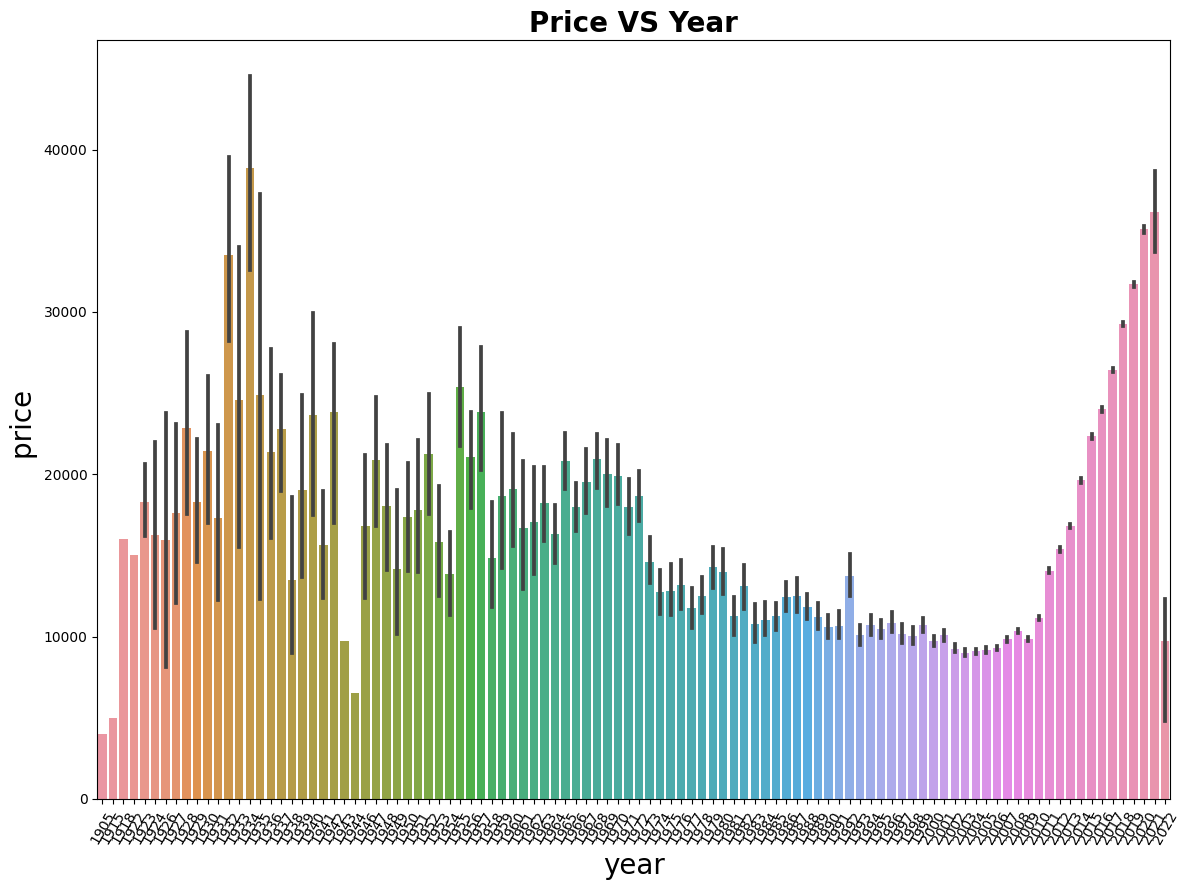

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=new_df['price'],x=new_df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

In [34]:
#We can see the car data before 1996 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1996


In [35]:
new_df = new_df[new_df['year'] > 1996]
new_df.shape

(264790, 14)

In [36]:
new_df['car_age'] = 2022 - new_df['year']
new_df.drop(['year'], axis = 1, inplace = True)
new_df.describe()

,price,odometer,car_age
count,264790.000000,264790.000000,264790.000000
mean,19556.905389,90423.555625,9.066917
std,12047.429756,57070.168218,4.909724
min,3525.000000,6958.000000,0.000000
25%,8999.000000,40000.000000,5.000000
50%,16995.000000,85000.000000,8.000000
75%,27990.000000,130333.000000,12.000000
max,58448.000000,278495.000000,25.000000


### Data Visualization

In [37]:
sample_data = new_df.sample(100)

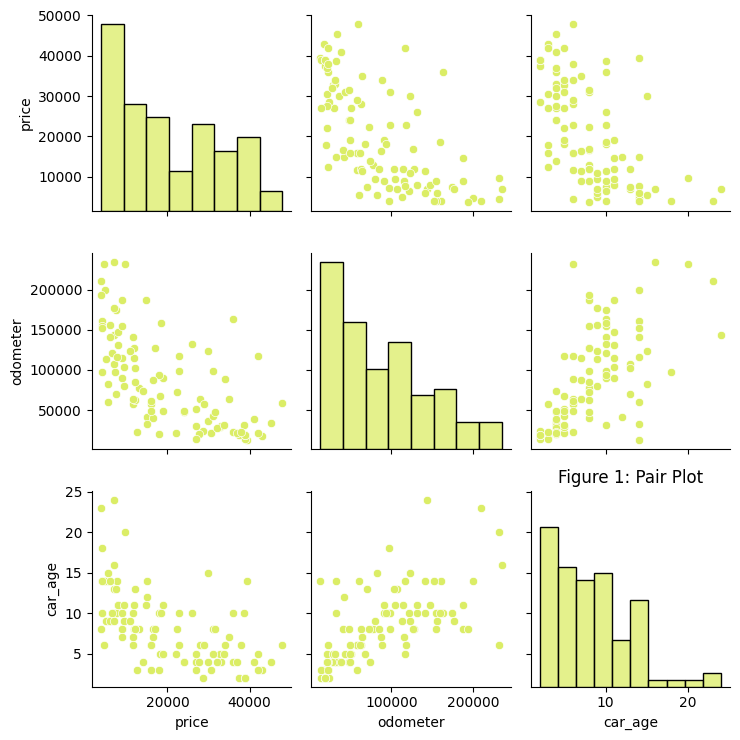

In [38]:
sns.pairplot(sample_data)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

<AxesSubplot: >

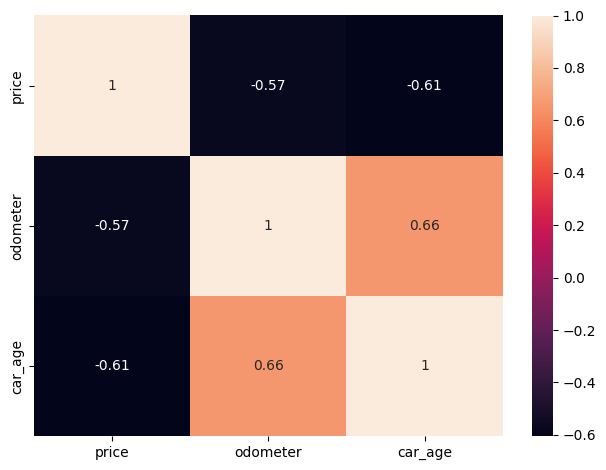

In [39]:
sns.heatmap(new_df.corr(), annot=True)

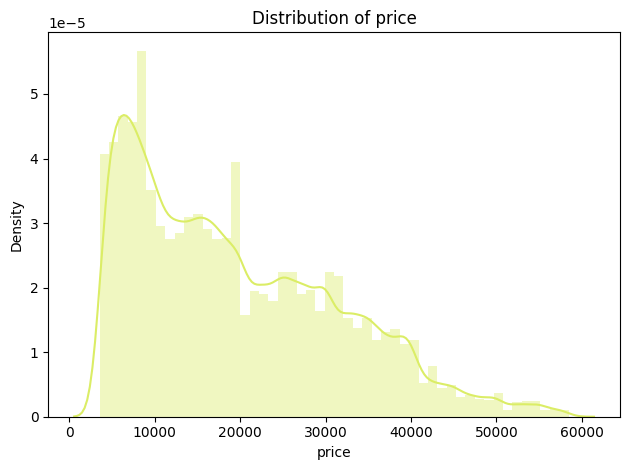

In [40]:
sns.distplot(new_df.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

In [41]:
new_df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age'],
      dtype='object')

In [42]:
final_df = new_df.copy()

In [43]:
#Creating encoder and implimenting them into pipeline

In [44]:
from sklearn.pipeline import Pipeline
pipe_categorical = Pipeline(
    steps = [('ordinal_encoder', OrdinalEncoder(categories = [[ 'salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']])),
             ('one_hot_encoder', OneHotEncoder(sparse = False, drop = 'first'))]
)

In [45]:
pipe_numerical = Pipeline(
    steps = [('standard_scaler', StandardScaler())]
)

In [46]:
column_transformer = ColumnTransformer(transformers = [
    ('condition_pipe_trans', pipe_categorical['ordinal_encoder'], ['condition']),
    ('categorical_pipe_trans', pipe_categorical['one_hot_encoder'], ['model', 'region', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'paint_color']),
    ('numerical_pipe_trans', pipe_numerical, ['odometer'])
])


### Train-test-split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['price'], axis = 1), final_df['price'], random_state = 42, test_size = .2)

In [49]:
X_train_tnf = column_transformer.fit_transform(X_train)

In [50]:
X_test_tnf = column_transformer.transform(X_test)

Model Training

In [51]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    return (r)


In [52]:
#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

Linear Regression

In [53]:
LR = LinearRegression()
LR.fit(X_train_tnf, y_train)
y_pred = LR.predict(X_test_tnf)

In [54]:
R2_score = r2_score(y_test, y_pred)*100
score_lr = result(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.6523
Mean squared error:  50719246.91
Mean absolute error:  5399.80
Root mean squared error:  7121.74


Ridge Regression

In [55]:
RR = Ridge(alpha=20.336, solver='auto')
RR.fit(X_train_tnf, y_train)
y_pred1 = RR.predict(X_test_tnf)

In [56]:
score_rr = result(y_test, y_pred1)
score_data['Ridge Regression'] = score_rr
print('R2 score: ', score_rr[0])
print('Mean squared error: ', score_rr[2])
print('Mean absolute error: ', score_rr[3])
print('Root mean squared error: ', score_rr[4])

R2 score:  0.6522
Mean squared error:  50735666.76
Mean absolute error:  5400.72
Root mean squared error:  7122.90


Lasso Regression

In [57]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_tnf, y_train)
y_pred2 = lasso.predict(X_test_tnf)

Random Forest Regression

In [58]:
score_lasso = result(y_test, y_pred2)
score_data['Lasso Regression'] = score_lasso
print('R2 score: ', score_lasso[0])
print('Mean squared error: ', score_lasso[2])
print('Mean absolute error: ', score_lasso[3])
print('Root mean squared error: ', score_lasso[4])

R2 score:  0.6523
Mean squared error:  50719250.76
Mean absolute error:  5399.80
Root mean squared error:  7121.74


In [59]:
RFR = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
RFR.fit(X_train_tnf, y_train)
y_pred = RFR.predict(X_test_tnf)

In [60]:
score_rfr = result(y_test, y_pred)
score_data['Random Forest Regression'] = score_rfr
print('R2 score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

R2 score:  0.8602
Mean squared error:  20401237.57
Mean absolute error:  2607.77
Root mean squared error:  4516.77


In [61]:
score_data

,Linear Regression,Ridge Regression,Lasso Regression,Random Forest Regression
R2 Score,0.6523,0.6522,0.6523,0.8602
Accuracy(%),65.2330,65.2217,65.2330,86.0154
Mean Squared Error,50719246.91,50735666.76,50719250.76,20401237.57
Mean Absolute Error,5399.80,5400.72,5399.80,2607.77
Root MSE,7121.74,7122.90,7121.74,4516.77


#### Conclusion:

Therefore, maximum accuracy score 86.02% with Random Forest Regresssion.